#Luis Tadeo Becerra Rocha
##Simulación
###Practica 5
###Transformada inversa - Distribución Binomial

Número de clientes que realizaron una compra en cada simulación (día):
[4, 2, 4, 3, 3, 3, 3, 4, 1, 4, 3, 3, 1, 2, 6, 1, 2, 4, 2, 4, 1, 2, 2, 2, 3, 0, 1, 2, 6, 2, 2, 4, 2, 1, 3, 4, 3, 2, 0, 2, 2, 2, 1, 3, 1, 2, 2, 3, 3, 1, 2, 4, 1, 5, 0, 3, 3, 3, 4, 4, 3, 3, 1, 3, 3, 1, 2, 3, 6, 3, 3, 1, 1, 3, 4, 2, 0, 6, 2, 3, 0, 1, 2, 5, 2, 1, 4, 3, 5, 4, 3, 3, 0, 2, 4, 4, 4, 3, 2, 4]


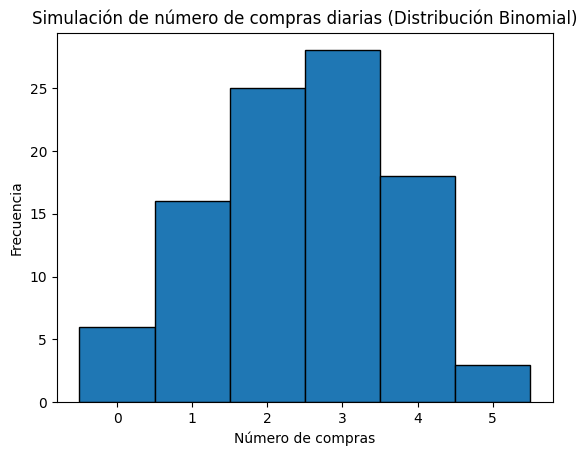

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 10   # Número de visitantes diarios
p = 0.30 # Probabilidad de que un visitante realice una compra

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (días)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de clientes que hicieron una compra
        k += 1

# Generar la cantidad de clientes que realizaron una compra en cada simulación (día)
compras_simuladas = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de clientes que realizaron una compra en cada simulación (día):")
print(compras_simuladas)

# Graficar los resultados
plt.hist(compras_simuladas, bins=np.arange(min(compras_simuladas), max(compras_simuladas) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de número de compras diarias (Distribución Binomial)")
plt.xlabel("Número de compras")
plt.ylabel("Frecuencia")
plt.show()